
### here we are using all types of algorithms and will compare the model accuracy 

In [280]:
import pandas as pd
import numpy as np


df=pd.read_csv('C:\\GitWorkspace\\UniversalBank.csv')
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [274]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### first we will do some EDA

In [275]:
import seaborn as sns

#droping zip and ids
df.drop(["ID","ZIP Code"],axis=1,inplace=True)


In [276]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


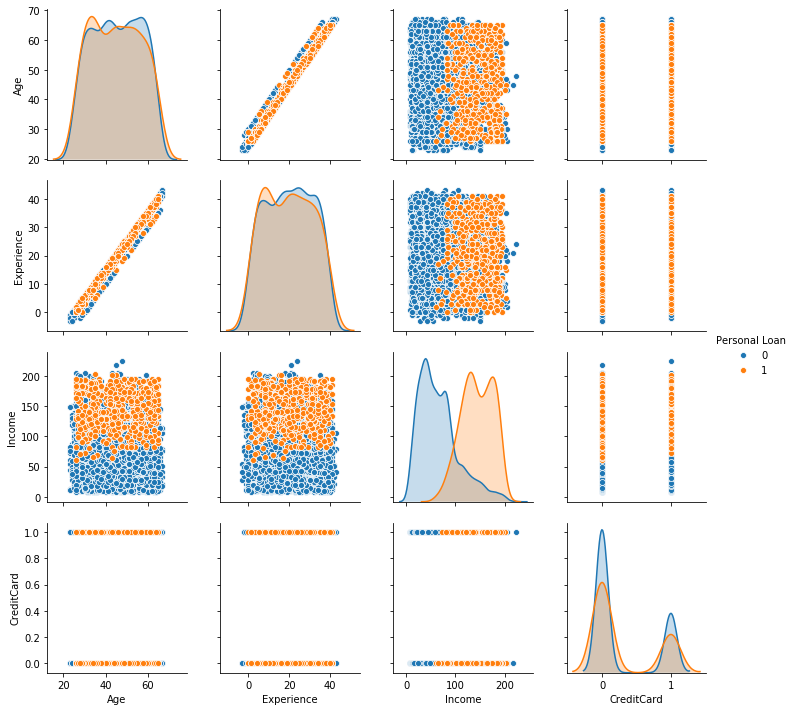

In [263]:
sns.pairplot(df,vars=['Age','Experience','Income','CreditCard'],hue='Personal Loan')

### in the above i have taken few rows to see the data with respect to Loan eligible or not
### below we are extaracting dependent and independent columns

In [277]:
#we are changing the categorical data  

categorical_data = ["Family","Education","Personal Loan","Securities Account","CD Account","Online","CreditCard"]



In [281]:
df=pd.get_dummies(df,columns=categorical_data,drop_first=True,)


In [282]:
df.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Personal Loan_1,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,1,25,1,49,91107,1.6,0,0,0,1,0,0,0,1,0,0,0
1,2,45,19,34,90089,1.5,0,0,1,0,0,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,0,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,2.7,0,0,0,0,1,0,0,0,0,0,0
4,5,35,8,45,91330,1.0,0,0,0,1,1,0,0,0,0,0,1


### getting the Dependent calumn and independent column

In [284]:
X_inde=df.copy().drop("Personal Loan_1",axis=1)
Y_inde=df["Personal Loan_1"]


In [253]:
#X_inde=df.loc[:,:'Income']
#X_inde['CreditCard']=df['CreditCard_1']
#Y_inde=df['Personal Loan_1']


##### now we do train and test split data

In [285]:
from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test=train_test_split(X_inde,Y_inde,random_state=12,test_size=0.20)


In [ ]:
### logistic regression

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_validation_pred=lr.predict(x_test)
accuracy_score(y_validation_pred,y_test)

C:\Users\pavankumar.gopidesu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9

### as we see above the accuracy is 90% we can do some scale down with mean =0 and standard deviation=1

In [287]:
from sklearn.preprocessing import StandardScaler

std_sc=StandardScaler()

X_train_std=std_sc.fit_transform(X_train)
x_test_std=std_sc.fit_transform(x_test)

In [288]:
sc_lr=LogisticRegression()
sc_lr.fit(X_train_std,y_train)
y_pred_std=sc_lr.predict(x_test_std)
accuracy_score(y_pred_std,y_test)

C:\Users\pavankumar.gopidesu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.955

### as we see here after scaling the accuracy is increased to 95%

## GaussianNB

In [289]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(X_train,y_train)

y_gnb_predict=gnb.predict(x_test)

accuracy_score(y_validation_pred,y_test)

0.9

### K nearest neighbour

In [257]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_classifier = KNeighborsClassifier(algorithm='brute',weights='distance')
knn_classifier.fit(X_train,y_train)
y_pred=knn_classifier.predict(x_test)

accuracy_score(y_pred,y_test)

0.898

## SVM

In [290]:
from sklearn.svm import SVC

svc_cl=SVC()
svc_cl.fit(X_train,y_train)

y_predict=svc_cl.predict(x_test)

accuracy_score(y_predict,y_test)


C:\Users\pavankumar.gopidesu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.908

## Random Forest

In [291]:
from sklearn.ensemble import RandomForestClassifier

rnd_cl=RandomForestClassifier()

rnd_cl.fit(X_train,y_train)
y_pred=rnd_cl.predict(x_test)

accuracy_score(y_pred,y_test)

C:\Users\pavankumar.gopidesu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.974

### now we can do some hyper parameter tuining to increase the accuracy


In [ ]:
#n_estimater is the number of trees for the randomforest
#max_depth is the how much deep tree is
#min_sample_leaf  minimum samples required in each leaf node for the root node to split

In [292]:
from sklearn.model_selection import RandomizedSearchCV


rnf_frst=RandomForestClassifier(n_jobs=-1, max_features='sqrt', class_weight='balanced_subsample')

param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
           "max_depth" : [10, 12, 14, 16, 18, 20],
           "min_samples_leaf" : [5, 10, 15, 20]}

In [294]:
grid_randrfc = RandomizedSearchCV(estimator = rnf_frst, param_distributions = param_grid, cv = 3, n_iter=10)
grid_randrfc.fit(X_train, y_train)
grid_randrfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=14, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

### as we see above it gives us to choose the best parameters for tuining

In [299]:
y_pred=grid_randrfc.predict(X_train)
accuracy_score(y_pred,y_train)

0.98875

### as we see above the accuracy is increased to 98.8%